In [ ]:
import os
from tabulate import tabulate
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
import pandas as pd
import math
import seaborn as sns
from google.colab import files

Group_01_Oracle.csv
0.5667734065263801 0.26026227508386696 0.17296431838975296 93 53 49 3.996666666666665 3.220377358490563 2.314897959183672


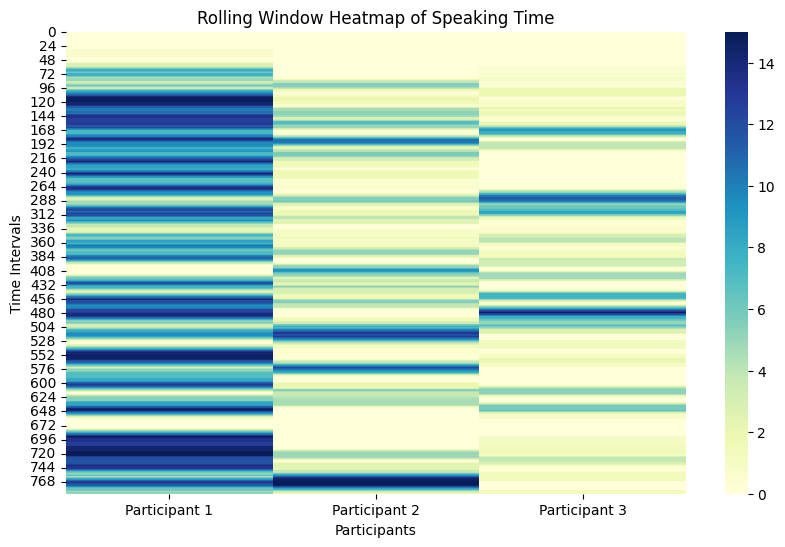

26 3 3


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Group_02_Oracle.csv
0.4614180434468476 0.3915514666923555 0.14703048986079684 69 63 29 2.776666666666669 2.5806349206349197 2.105172413793107


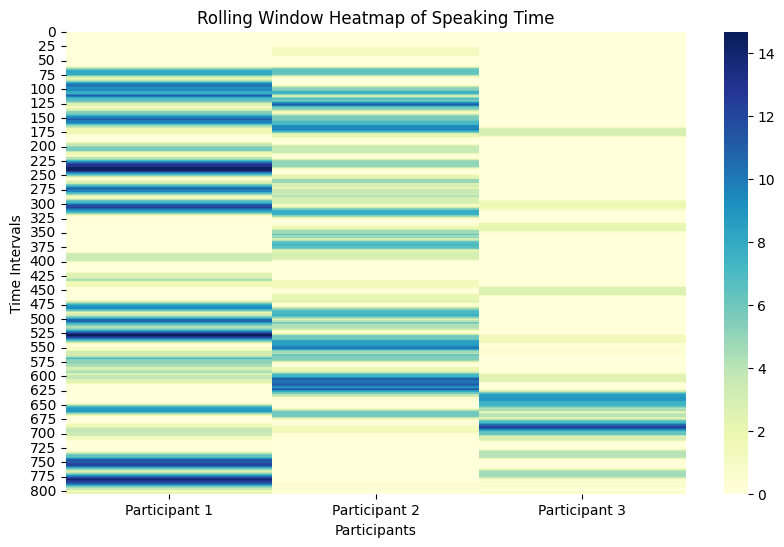

10 3 1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Group_03_Oracle.csv
0.3951884368602559 0.20643028433309155 0.39838127880665253 103 56 104 3.6302815533980626 3.4878571428571505 3.6244230769230774


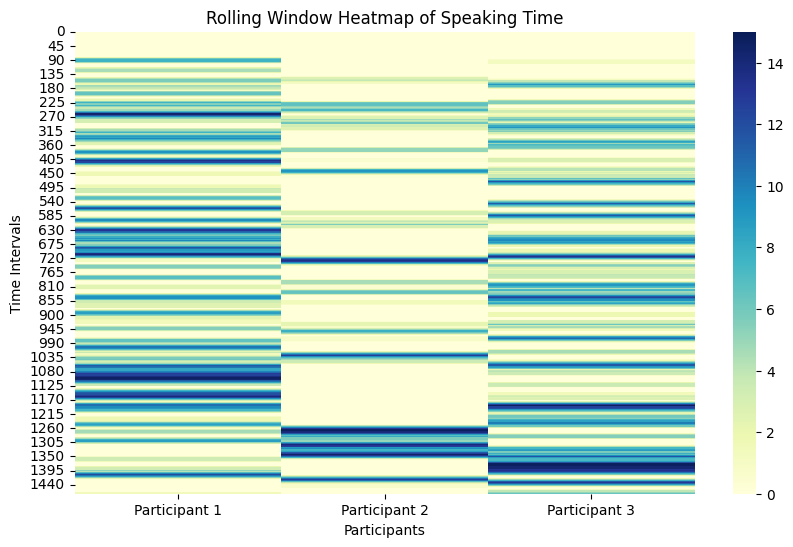

14 6 10


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Group_04_Oracle.csv
0.2459970633477831 0.30403090476856387 0.4499720318836529 45 58 55 3.1273333333333286 2.998793103448277 4.680363636363641


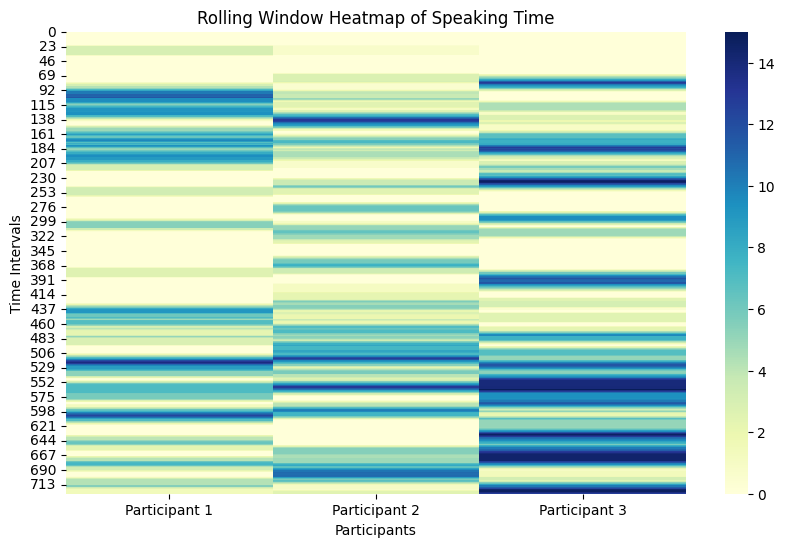

4 4 14


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Group_05_Oracle.csv
0.4168529197485892 0.27537878320141285 0.3077682970499979 82 54 54 4.116829268292685 4.12981481481482 4.615555555555554


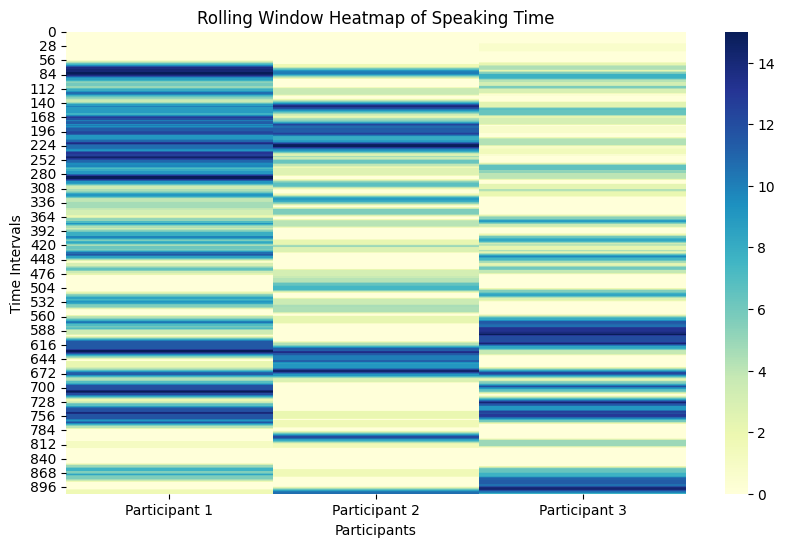

21 9 10


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Group_06_Oracle.csv
0.23444134314471804 0.4521864163071983 0.3133722405480838 43 85 58 3.223023255813958 3.1448235294117706 3.1939655172413777


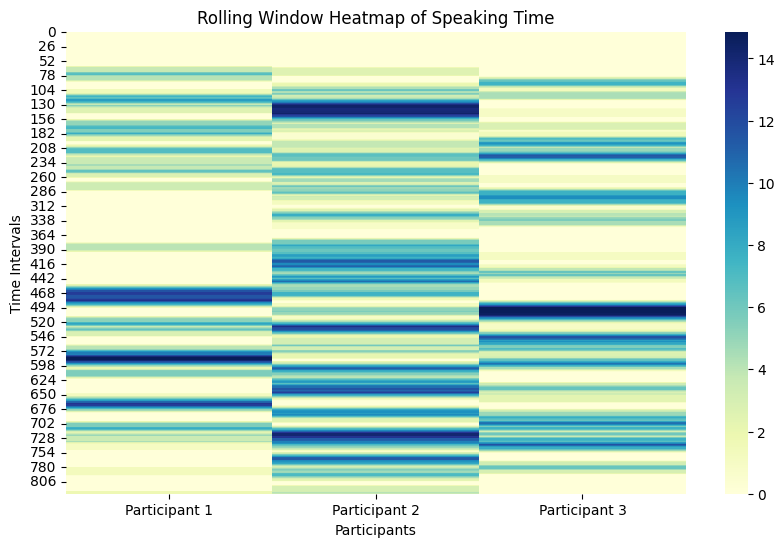

4 9 5


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Group_07_Oracle.csv
0.20673262238211418 0.3196791083129901 0.47358826930489567 99 142 217 2.6004040404040305 2.8034507042253534 2.717741935483872


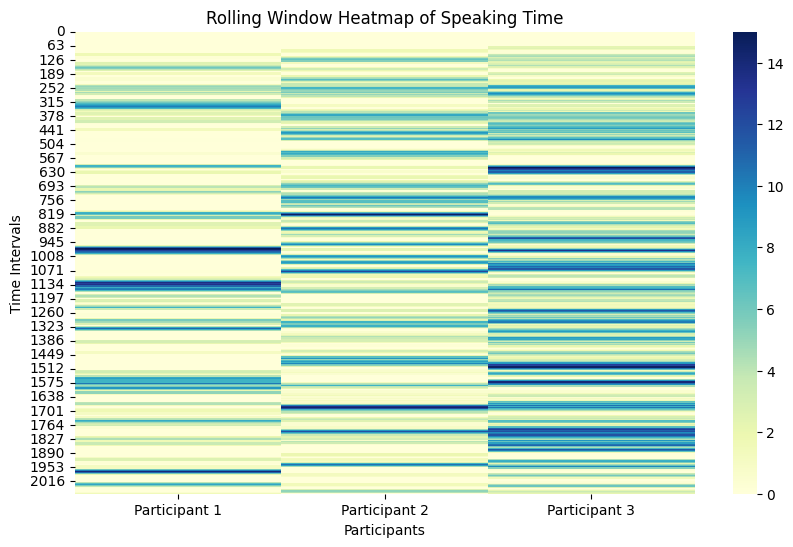

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

10 3 19
Group_08_Oracle.csv
0.34422812802274455 0.24511150419777328 0.4106603677794822 107 83 114 3.009953271028036 2.7630120481927642 3.3703508771929815


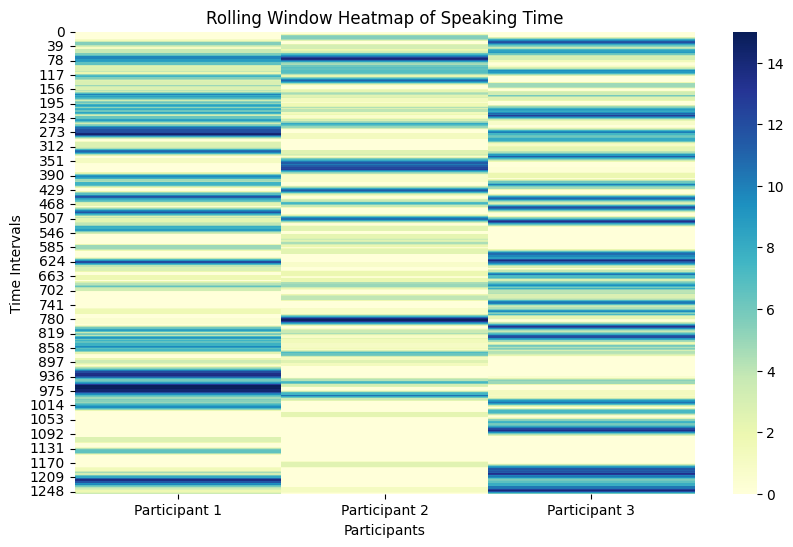

11 6 12


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Group_09_Oracle.csv
0.3046246021344318 0.18457217749485097 0.5108032203707172 32 24 44 2.5421875000000034 2.0537500000000004 3.100227272727277


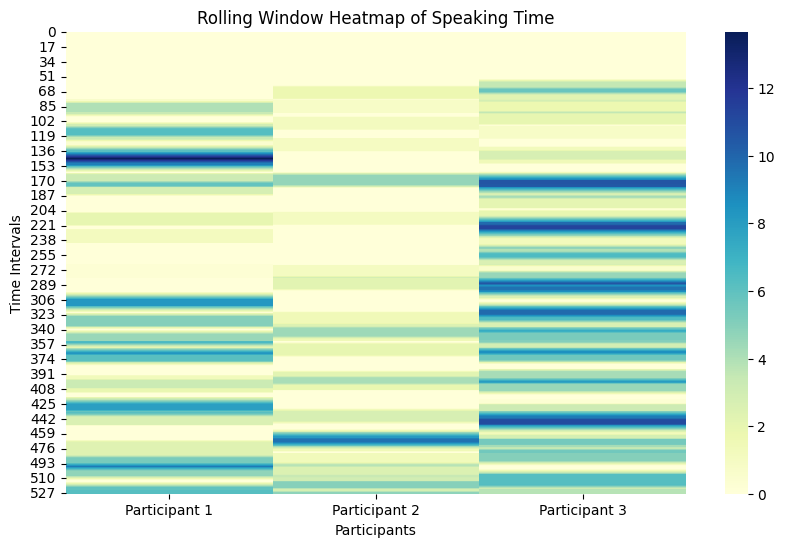

1 0 0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Group_10_Oracle.csv
0.2085462664351277 0.38714959067228993 0.4043041428925823 51 90 92 3.2966666666666664 3.4680000000000026 3.5429347826086954


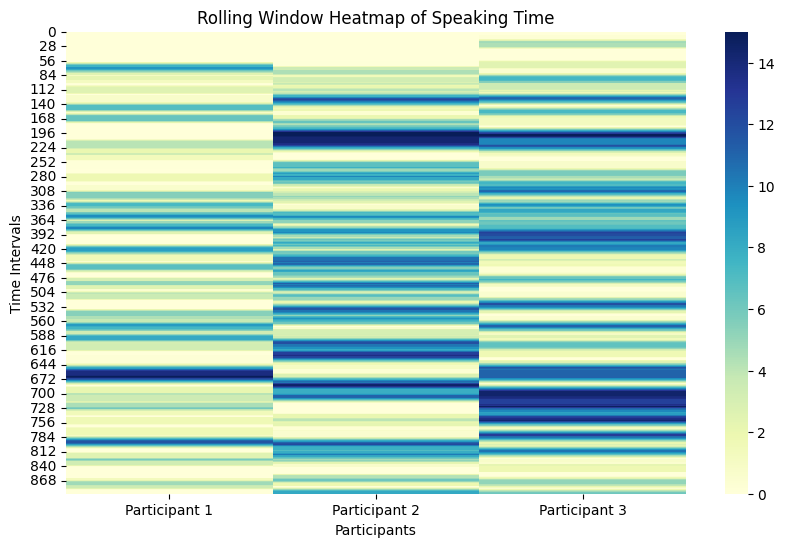

2 13 14


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
for i in range(1, 11):
  file_name = f'Group_{i:02d}_Oracle.csv'
  df = pd.read_csv(file_name, usecols = ['Start', 'End', 'Participant'])
  df = df.loc[df['Participant'] != 4]
  df['utterance_duration'] = df.apply(lambda row: row['End'] - row['Start'], axis=1)
  df['utterance_duration'] = df['utterance_duration'].abs()

  print(file_name)
  percent1, percent2, percent3, count1, count2, count3, avg1, avg2, avg3 = get_utterance_stats(df)
  print(percent1, percent2, percent3, count1, count2, count3, avg1, avg2, avg3)
  make_heatmap(i)

In [ ]:
def get_intervals(df):
  numbers = list(range(math.floor(df['End'].max()) + 2))

  # Create a DataFrame from the list
  df_intervals = pd.DataFrame(numbers, columns=['Numbers'])
  df_intervals['Participant 1'] = 0
  df_intervals['Participant 2'] = 0
  df_intervals['Participant 3'] = 0
  df1 = df.loc[df['Participant'] == 1]
  df2 = df.loc[df['Participant'] == 2]
  df3 = df.loc[df['Participant'] == 3]
  for index, row in df1.iterrows():
    if row['End'] < math.floor(row['Start']) + 1:
      df_intervals.loc[math.floor(row['Start']), 'Participant 1'] +=  row['End'] - row['Start']
    else:
      df_intervals.loc[math.floor(row['Start']), 'Participant 1'] +=  math.floor(row['Start']) - row['Start'] + 1
      for i in range(math.floor(row['Start']), math.floor(row['End'])):
        df_intervals.loc[i, 'Participant 1'] = 1
      df_intervals.loc[math.floor(row['End']), 'Participant 1'] +=  row['End'] - math.floor(row['End'])
    df_intervals['Participant 1'] = df_intervals['Participant 1'].apply(lambda x: x if 0 <= x <= 1 else 0)
  for index, row in df2.iterrows():
    if row['End'] < math.floor(row['Start']) + 1:
      df_intervals.loc[math.floor(row['Start']), 'Participant 2'] +=  row['End'] - row['Start']
    else:
      df_intervals.loc[math.floor(row['Start']), 'Participant 2'] +=  math.floor(row['Start']) - row['Start'] + 1
      for i in range(math.floor(row['Start'])+1, math.floor(row['End'])):
        df_intervals.loc[i, 'Participant 2'] = 1
      df_intervals.loc[math.floor(row['End']), 'Participant 2'] +=  row['End'] - math.floor(row['End'])
    df_intervals['Participant 2'] = df_intervals['Participant 2'].apply(lambda x: x if 0 <= x <= 1 else 0)
  for index, row in df3.iterrows():
    if row['End'] < math.floor(row['Start']) + 1:
      df_intervals.loc[math.floor(row['Start']), 'Participant 3'] +=  row['End'] - row['Start']
    else:
      df_intervals.loc[math.floor(row['Start']), 'Participant 3'] +=  math.floor(row['Start']) - row['Start'] + 1
      for i in range(math.floor(row['Start'])+1, math.floor(row['End'])):
        df_intervals.loc[i, 'Participant 3'] = 1
      df_intervals.loc[math.floor(row['End']), 'Participant 3'] +=  row['End'] - math.floor(row['End'])
    df_intervals['Participant 3'] = df_intervals['Participant 3'].apply(lambda x: x if 0 <= x <= 1 else 0)
  df_intervals.fillna(0, inplace=True)
  return(df_intervals)

In [ ]:
def get_utterance_stats(df):
  total = df['utterance_duration'].sum()
  total1 = df.loc[df['Participant'] == 1, 'utterance_duration'].sum()
  total2 = df.loc[df['Participant'] == 2, 'utterance_duration'].sum()
  total3 = df.loc[df['Participant'] == 3, 'utterance_duration'].sum()
  percent1 = total1/total
  percent2 = total2/total
  percent3 = total3/total
  filtered_df1 = df[df['Participant'] == 1]
  count1 = filtered_df1.shape[0]
  filtered_df2 = df[df['Participant'] == 2]
  count2 = filtered_df2.shape[0]
  filtered_df3 = df[df['Participant'] == 3]
  count3 = filtered_df3.shape[0]
  avg1 = total1/count1
  avg2 = total2/count2
  avg3 = total3/count3
  return percent1, percent2, percent3, count1, count2, count3, avg1, avg2, avg3

In [ ]:
def make_heatmap(i):
  df_intervals = get_intervals(df)
  window_size = 15  # Example: intervals (45 seconds)

  # Calculate the rolling sum for each participant
  df_intervals = df_intervals.drop('Numbers', axis=1)  # Remove the 'Numbers' column
  rolling_df = df_intervals.rolling(window_size, min_periods=1).sum()
  rolling_df2 = df_intervals.rolling(30, min_periods=30, step=15).sum()

  # Create the heatmap
  plt.figure(figsize=(10, 6))  # Adjust figure size as needed
  sns.heatmap(rolling_df, cmap="YlGnBu")  # Choose a suitable colormap
  plt.title("Rolling Window Heatmap of Speaking Time")
  plt.xlabel("Participants")
  plt.ylabel("Time Intervals")
  plt.show()

  part1 = 0
  part2 = 0
  part3 = 0

  dominance_df = pd.DataFrame()
  dominance_df['Participant 1'] = 0
  dominance_df['Participant 2'] = 0
  dominance_df['Participant 3'] = 0

  for index, row in rolling_df2.iterrows():
    if row['Participant 1'] > 15:
      part1 += 1
      dominance_df.loc[index, 'Participant 1'] = 1
    if row['Participant 2'] > 15:
      part2 += 1
      dominance_df.loc[index, 'Participant 2'] = 1
    if row['Participant 3'] > 15:
      part3 += 1
      dominance_df.loc[index, 'Participant 3'] = 1

  print(part1, part2, part3)

  dominance_df.to_csv(f'output_{i:02d}.csv', encoding='utf-8-sig')
  files.download(f'output_{i:02d}.csv')